In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy as cp
import cartopy.feature as cfeature
import cartopy.crs as ccrs

In [3]:
rain_india = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/assignment_3/output-rain.india.nc')

In [4]:
rain_india = rain_india['tp']

In [5]:
rain_india

<xarray.DataArray 'tp' (time: 90, latitude: 117, longitude: 201)>
[2116530 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-07-25T11:30:00 ... 2019-08-07T11:30:00
  * longitude  (longitude) float32 60.0 60.25 60.5 60.75 ... 109.5 109.8 110.0
  * latitude   (latitude) float32 35.0 34.75 34.5 34.25 ... 6.75 6.5 6.25 6.0
Attributes:
    long_name:     Total precipitation
    units:         m
    cell_methods:  time: sum

In [6]:
# take mean of the rain_india along the time axis 
rain_india_clim = rain_india.mean(dim='time')

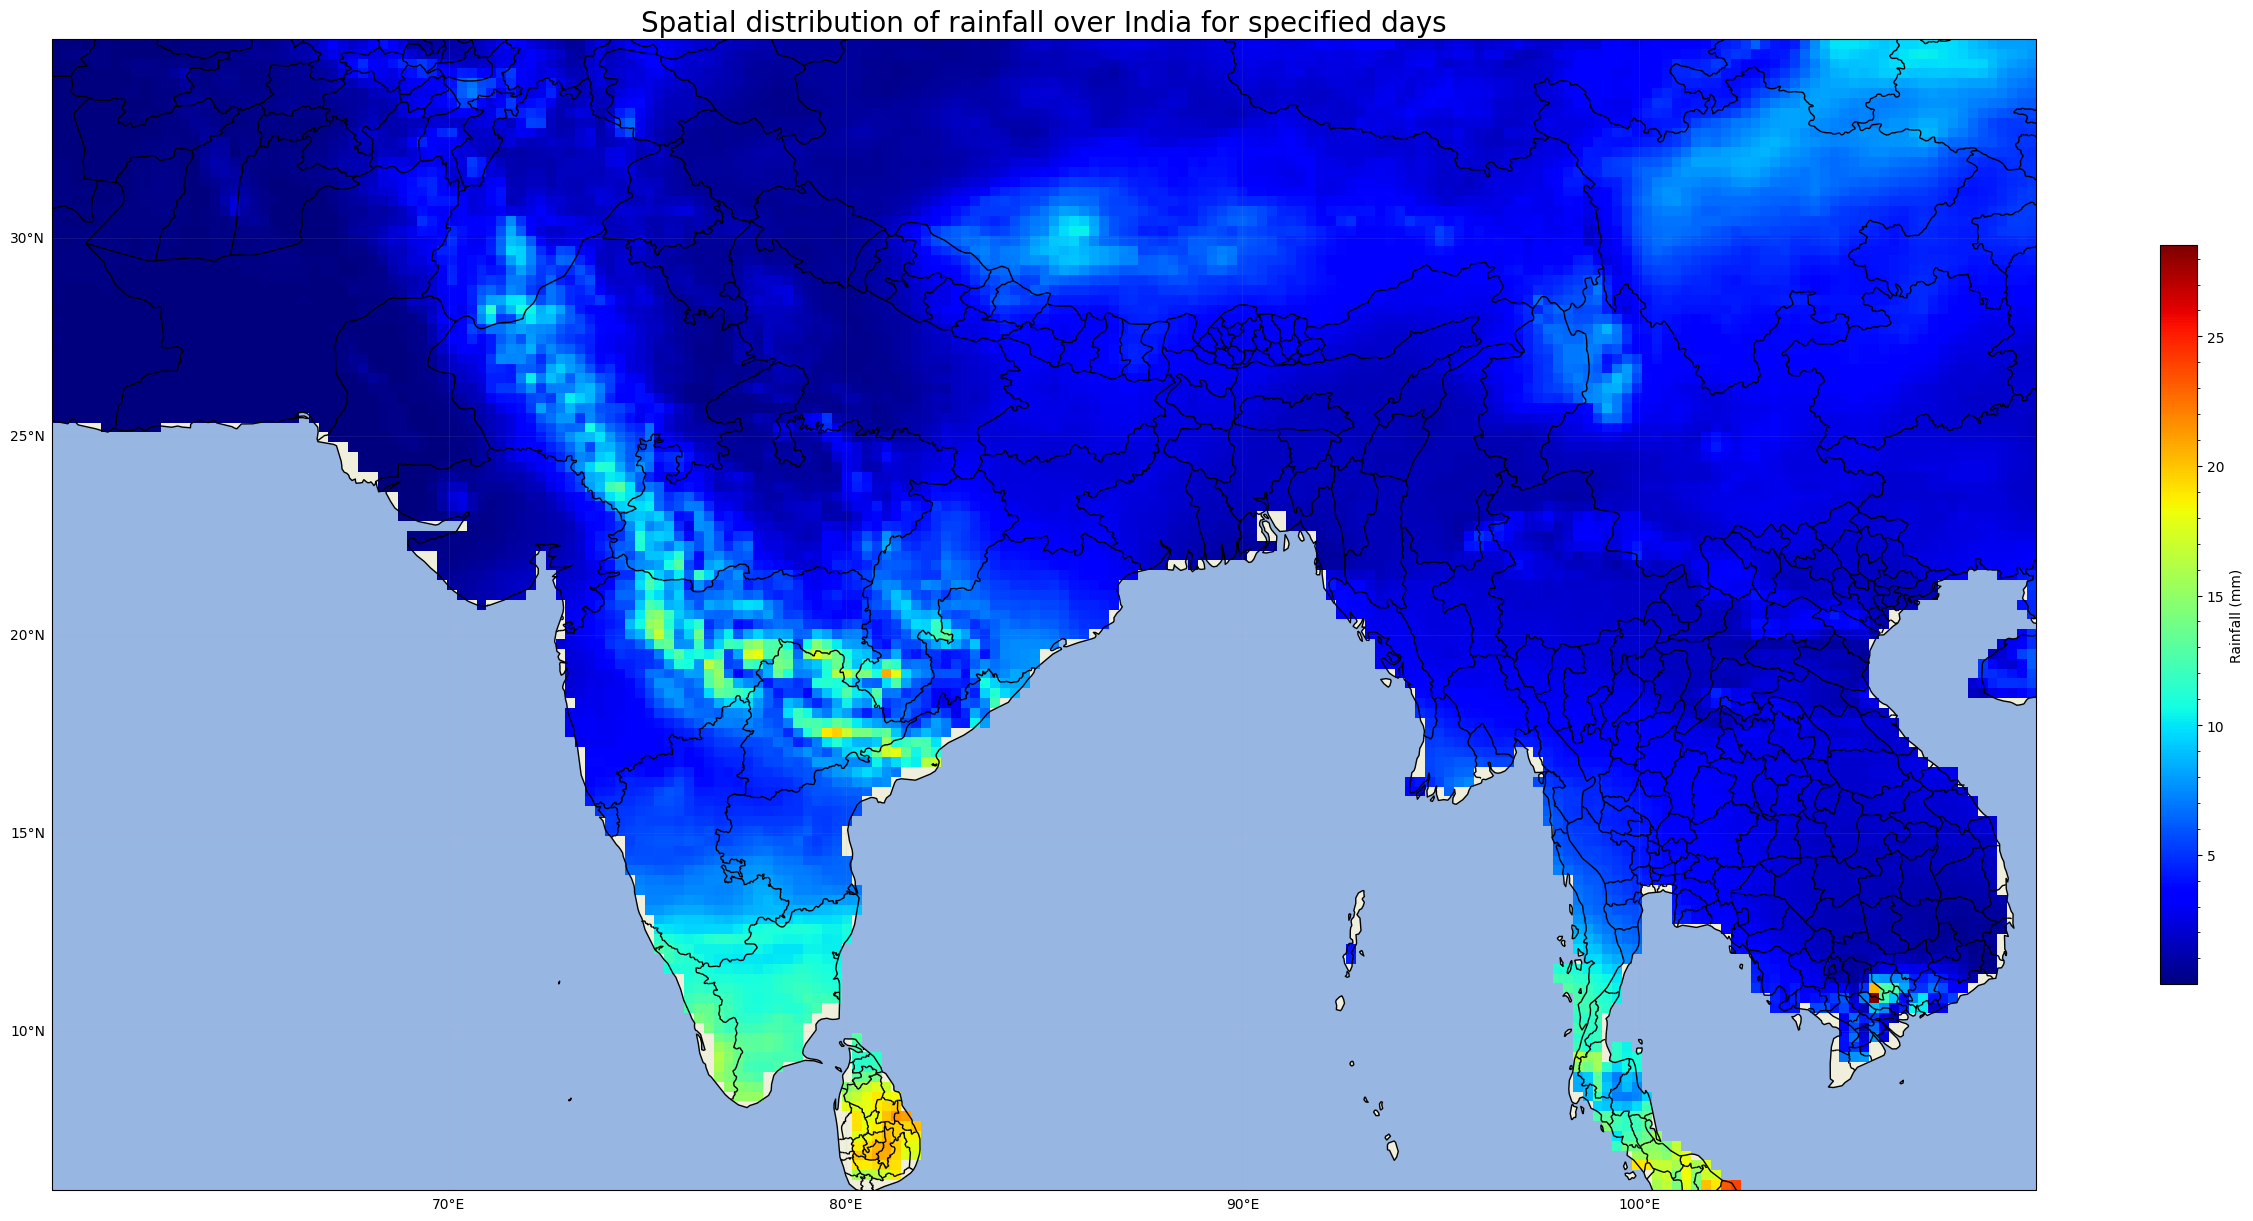

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy as cp
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from pylab import *

# data = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/clim_extreme/eca_r10mm.CIR.spatial.nc')
# data = data.squeeze()

# data_array = np.asarray(data['heavy_precipitation_days_index_per_time_period'])
lon = rain_india_clim.longitude
lat = rain_india_clim.latitude

fig = plt.figure(figsize=(32,32))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

mp = ax.imshow(rain_india_clim*1000,extent=(lon.min(),lon.max(),lat.min(),lat.max()),cmap='jet',origin='upper')
plt.title('Spatial distribution of rainfall over India for specified days',fontsize=20)

# rest of the code remains the same


states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='black')
ax.add_feature(states_provinces, edgecolor='black')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp, shrink=0.3,label='Rainfall (mm)')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

plt.savefig('/home/shiv/Documents/GitHub/EES405/assignment_3/plots_assignment-3/rainfall-spatial.png', dpi=1200, bbox_inches='tight')
plt.show()


In [8]:
mslp_india = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/assignment_3/output-sea-pressure.india.nc')

In [9]:
mslp_india = mslp_india['msl']

In [10]:
mslp_india

<xarray.DataArray 'msl' (time: 90, latitude: 117, longitude: 201)>
[2116530 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-07-25T11:30:00 ... 2019-08-07T11:30:00
  * longitude  (longitude) float32 60.0 60.25 60.5 60.75 ... 109.5 109.8 110.0
  * latitude   (latitude) float32 35.0 34.75 34.5 34.25 ... 6.75 6.5 6.25 6.0
Attributes:
    standard_name:  air_pressure_at_mean_sea_level
    long_name:      Mean sea level pressure
    units:          Pa

In [11]:
mslp_india = mslp_india.mean(dim='time')

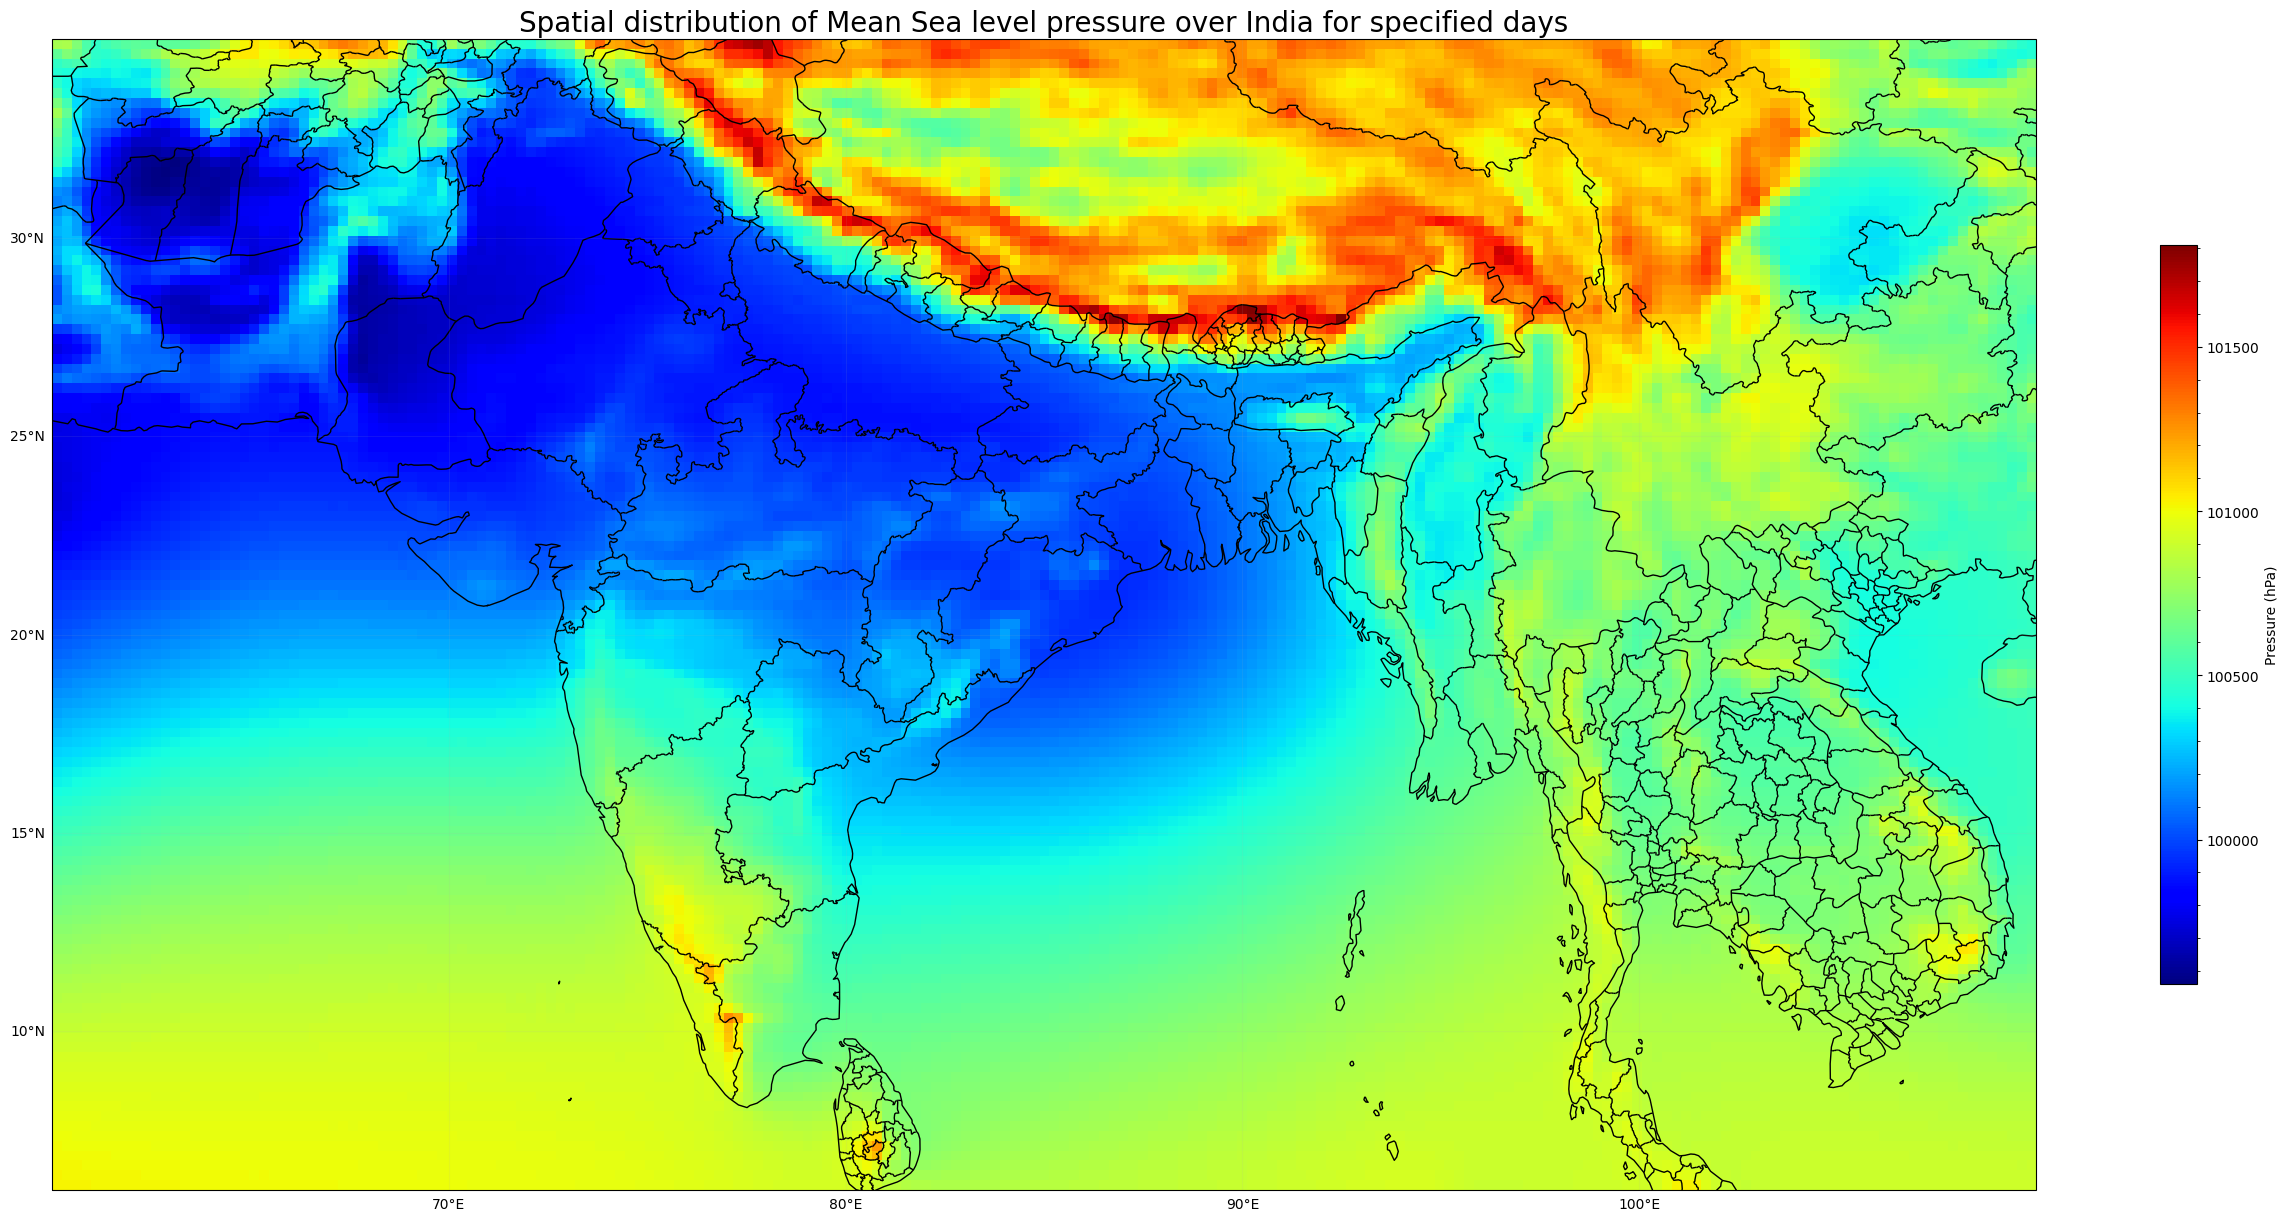

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy as cp
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from pylab import *

# data = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/clim_extreme/eca_r10mm.CIR.spatial.nc')
# data = data.squeeze()

# data_array = np.asarray(data['heavy_precipitation_days_index_per_time_period'])
lon = mslp_india.longitude
lat = mslp_india.latitude

fig = plt.figure(figsize=(32,32))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

mp = ax.imshow(mslp_india,extent=(lon.min(),lon.max(),lat.min(),lat.max()),cmap='jet',origin='upper')
plt.title('Spatial distribution of Mean Sea level pressure over India for specified days',fontsize=20)

# rest of the code remains the same


states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='black')
ax.add_feature(states_provinces, edgecolor='black')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp, shrink=0.3,label='Pressure (hPa)')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

plt.savefig('/home/shiv/Documents/GitHub/EES405/assignment_3/plots_assignment-3/mslp-spatial.png', dpi=1200, bbox_inches='tight')
plt.show()


UV wind data at 200hPa plots 

In [13]:
uwind = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/assignment_3/output-uwind.india.nc')

In [14]:
uwind = uwind['u']

In [15]:
uwind

<xarray.DataArray 'u' (time: 90, level: 19, latitude: 117, longitude: 161)>
[32211270 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-07-25T11:30:00 ... 2019-08-07T11:30:00
  * longitude  (longitude) float32 60.0 60.25 60.5 60.75 ... 99.5 99.75 100.0
  * latitude   (latitude) float32 35.0 34.75 34.5 34.25 ... 6.75 6.5 6.25 6.0
  * level      (level) float64 100.0 150.0 200.0 250.0 ... 900.0 950.0 1e+03
Attributes:
    standard_name:  eastward_wind
    long_name:      U component of wind
    units:          m s**-1

In [16]:
# select level 200 hPa from the uwind data 
uwind_200 = uwind.sel(level=200)

In [17]:
uwind_200

<xarray.DataArray 'u' (time: 90, latitude: 117, longitude: 161)>
[1695330 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-07-25T11:30:00 ... 2019-08-07T11:30:00
  * longitude  (longitude) float32 60.0 60.25 60.5 60.75 ... 99.5 99.75 100.0
  * latitude   (latitude) float32 35.0 34.75 34.5 34.25 ... 6.75 6.5 6.25 6.0
    level      float64 200.0
Attributes:
    standard_name:  eastward_wind
    long_name:      U component of wind
    units:          m s**-1

In [18]:
uwind_200_clim = uwind_200.mean(dim='time')

In [19]:
uwind_200_clim

<xarray.DataArray 'u' (latitude: 117, longitude: 161)>
array([[ 16.717482,  16.771763,  16.812695, ...,  13.439094,  13.445151,
         13.455394],
       [ 16.07539 ,  16.148983,  16.199677, ...,  12.728505,  12.737925,
         12.75963 ],
       [ 15.46111 ,  15.515474,  15.553053, ...,  12.029651,  12.032795,
         12.059262],
       ...,
       [-25.490164, -25.451237, -25.413818, ..., -16.76107 , -16.670752,
        -16.57585 ],
       [-25.449883, -25.42337 , -25.397982, ..., -16.981148, -16.887726,
        -16.823376],
       [-25.446531, -25.429565, -25.407978, ..., -17.21434 , -17.126743,
        -17.076368]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 60.0 60.25 60.5 60.75 ... 99.5 99.75 100.0
  * latitude   (latitude) float32 35.0 34.75 34.5 34.25 ... 6.75 6.5 6.25 6.0
    level      float64 200.0

In [20]:
# do the same analysis for vwind file 

vwind = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/assignment_3/output-vwind.india.nc')
vwind = vwind['v']
vwind_200 = vwind.sel(level=200)
vwind_200_clim = vwind_200.mean(dim='time')

In [21]:
vwind_200_clim

<xarray.DataArray 'v' (latitude: 117, longitude: 161)>
array([[-1.6637193 , -1.5930183 , -1.4921029 , ..., -5.479647  ,
        -5.6286416 , -5.7816243 ],
       [-1.4987713 , -1.4142033 , -1.3216716 , ..., -5.498605  ,
        -5.6379776 , -5.763007  ],
       [-1.3187668 , -1.2272921 , -1.1425581 , ..., -5.496675  ,
        -5.637209  , -5.760606  ],
       ...,
       [ 0.04350718, -0.01999761, -0.08857566, ..., -8.372468  ,
        -8.252779  , -8.1523285 ],
       [-0.02548438, -0.09220566, -0.1640448 , ..., -8.430904  ,
        -8.30984   , -8.209396  ],
       [-0.13102582, -0.19498026, -0.26416692, ..., -8.476273  ,
        -8.364858  , -8.263661  ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 60.0 60.25 60.5 60.75 ... 99.5 99.75 100.0
  * latitude   (latitude) float32 35.0 34.75 34.5 34.25 ... 6.75 6.5 6.25 6.0
    level      float64 200.0

In [ ]:
### Now since I have both uwind and vwind at 200hPa, I wish to plot a quiver plot for them 

# from cartopy.util import add_cyclic_point

# # may = xr.open_dataset('../monsoon/datasets/skt.may.nc')

# # may = may.skt
# # clim_may = may.mean(dim='time')

# ## adding the cyclic points to remove the missing data at the center of the plot

# # data = clim_may['uwnd']
# lon = uwnd_may.squeeze().coords['lon']

# print("Original shape -", uwnd_may.shape)

# # Add cyclic point to uwnd and vwnd
# lon_idx = uwnd_may.dims.index('lon')
# wrap_data_uwnd_may, wrap_lon = add_cyclic_point(uwnd_may.squeeze().values, coord=lon, axis=lon_idx)
# wrap_data_vwnd_may,wrap_lon = add_cyclic_point(vwnd_may.values, coord=lon, axis=lon_idx)

# Compute vector addition
wind_may = np.sqrt(uwind_200_clim**2 + vwind_200_clim**2)
wind_may_direction = np.arctan2(vwind_200_clim, uwind_200_clim)

u_wind_add = wind_may * np.cos(wind_may_direction)
v_wind_add = wind_may * np.sin(wind_may_direction)

# print("New shape -", wrap_data_uwnd_may.shape)

# Plotting the data 

# lon = uwnd_may.lon
lat = uwind_200_clim.latitude
lon = uwind_200_clim.longitude

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

# Create 2D grid of longitudes and latitudes
lon_2d, lat_2d = np.meshgrid(lon, lat)

# Compute vector addition of u-wind and v-wind
# u_wind_add = u_wind_add + v_wind_add
# v_wind_add = v_wind_add + u_wind_add

# Compute wind speed from u-wind and v-wind
wind_may = np.sqrt(u_wind_add**2 + v_wind_add**2)


# Plot vector addition
skip = (slice(None, None, 2), slice(None, None, 2))
ax.quiver(lon_2d[skip], lat_2d[skip], u_wind_add[skip], v_wind_add[skip],
          transform=ccrs.PlateCarree(), scale=400)



# Plot wind speed as contour plot
mp = ax.imshow(wind_may, extent=(wrap_lon.min(),wrap_lon.max(),lat.min(),lat.max()), cmap='jet', origin='upper')


states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
# ax.add_feature(cfeature.BORDERS,edgecolor='blue')
# ax.add_feature(states_provinces, edgecolor='blue')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp, shrink=0.3,label='Wind Speed')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

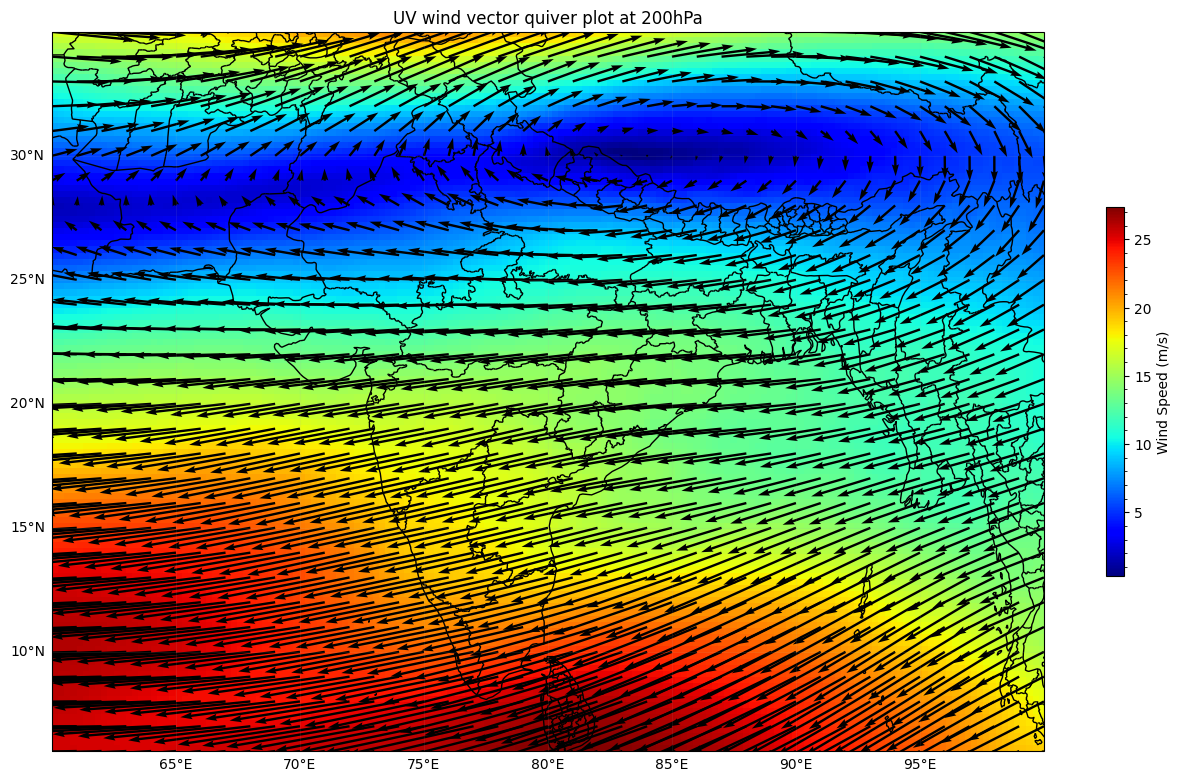

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

lat = uwind_200_clim.latitude
lon = uwind_200_clim.longitude

fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

# Create 2D grid of longitudes and latitudes
lon_2d, lat_2d = np.meshgrid(lon, lat)

# Compute vector addition of u-wind and v-wind
u_wind_add = uwind_200_clim.values
v_wind_add = vwind_200_clim.values

# Compute wind speed from u-wind and v-wind
wind_may = np.sqrt(u_wind_add**2 + v_wind_add**2)

# Plot vector addition
skip = (slice(None, None, 4), slice(None, None, 4))
ax.quiver(lon_2d[skip], lat_2d[skip], u_wind_add[skip], v_wind_add[skip],
          transform=ccrs.PlateCarree(), scale=200)

# Plot wind speed as contour plot
mp = ax.imshow(wind_may, extent=(lon.min(), lon.max(), lat.min(), lat.max()), cmap='jet', origin='upper')


states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='black')
ax.add_feature(states_provinces, edgecolor='black')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)

cbar = fig.colorbar(mp, shrink=0.3, label='Wind Speed (m/s)')
cbar.minorticks_on()

# Adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True, alpha=0.1)
gl.top_labels = False
gl.right_labels = False
plt.title('UV wind vector quiver plot at 200hPa')
plt.savefig('/home/shiv/Documents/GitHub/EES405/assignment_3/plots_assignment-3/uvwind-200hPa.png',dpi=1200,bbox_inches='tight')
plt.show()


Plotting the same for 850 hPa 

In [23]:
uwind_850 = uwind.sel(level=850)
vwind_850 = vwind.sel(level=850)

uwind_850_clim = uwind_850.mean(dim='time')
vwind_850_clim = vwind_850.mean(dim='time')

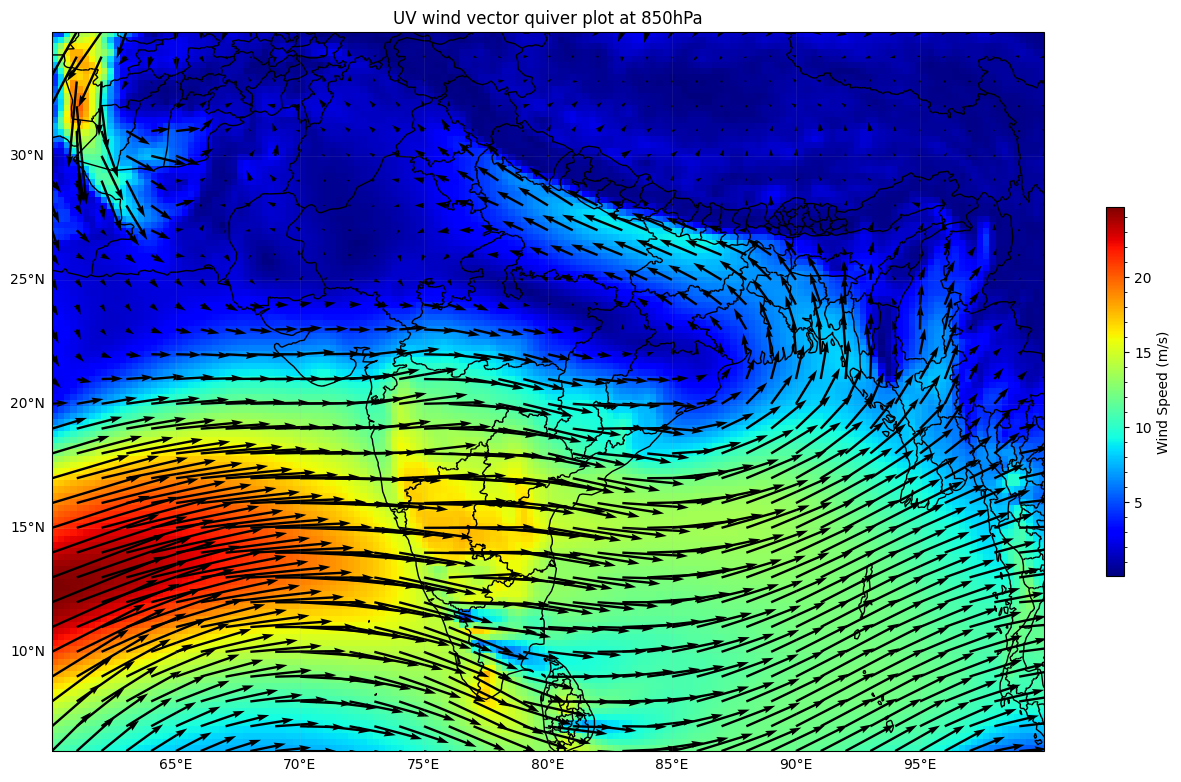

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

lat = uwind_850_clim.latitude
lon = uwind_850_clim.longitude

fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

# Create 2D grid of longitudes and latitudes
lon_2d, lat_2d = np.meshgrid(lon, lat)

# Compute vector addition of u-wind and v-wind
u_wind_add = uwind_850_clim.values
v_wind_add = vwind_850_clim.values

# Compute wind speed from u-wind and v-wind
wind_may = np.sqrt(u_wind_add**2 + v_wind_add**2)

# Plot vector addition
skip = (slice(None, None, 4), slice(None, None, 4))
ax.quiver(lon_2d[skip], lat_2d[skip], u_wind_add[skip], v_wind_add[skip],
          transform=ccrs.PlateCarree(), scale=200)

# Plot wind speed as contour plot
mp = ax.imshow(wind_may, extent=(lon.min(), lon.max(), lat.min(), lat.max()), cmap='jet', origin='upper')


states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='black')
ax.add_feature(states_provinces, edgecolor='black')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)

cbar = fig.colorbar(mp, shrink=0.3, label='Wind Speed (m/s)')
cbar.minorticks_on()

# Adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True, alpha=0.1)
gl.top_labels = False
gl.right_labels = False
plt.title('UV wind vector quiver plot at 850hPa')
plt.savefig('/home/shiv/Documents/GitHub/EES405/assignment_3/plots_assignment-3/uvwind-850hPa.png',dpi=200,bbox_inches='tight')
plt.show()


Precipitable water over India 

In [25]:
prec_water = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/assignment_3/output-pre-wat-india.nc')

In [26]:
prec_water

<xarray.Dataset>
Dimensions:    (time: 90, bnds: 2, longitude: 201, latitude: 117)
Coordinates:
  * time       (time) datetime64[ns] 2008-07-25T11:00:00 ... 2019-08-07T11:00:00
  * longitude  (longitude) float32 60.0 60.25 60.5 60.75 ... 109.5 109.8 110.0
  * latitude   (latitude) float32 35.0 34.75 34.5 34.25 ... 6.75 6.5 6.25 6.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    tcrw       (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Tue Apr 11 00:35:37 2023: cdo sellonlatbox,60,110,6,35 outp...
    frequency:    day
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [27]:
prec_water = prec_water['tcrw']

In [28]:
prec_water

<xarray.DataArray 'tcrw' (time: 90, latitude: 117, longitude: 201)>
[2116530 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-07-25T11:00:00 ... 2019-08-07T11:00:00
  * longitude  (longitude) float32 60.0 60.25 60.5 60.75 ... 109.5 109.8 110.0
  * latitude   (latitude) float32 35.0 34.75 34.5 34.25 ... 6.75 6.5 6.25 6.0
Attributes:
    long_name:     Total column rain water
    units:         kg m**-2
    cell_methods:  time: mean

In [29]:
prec_water_clim = prec_water.mean(dim='time')

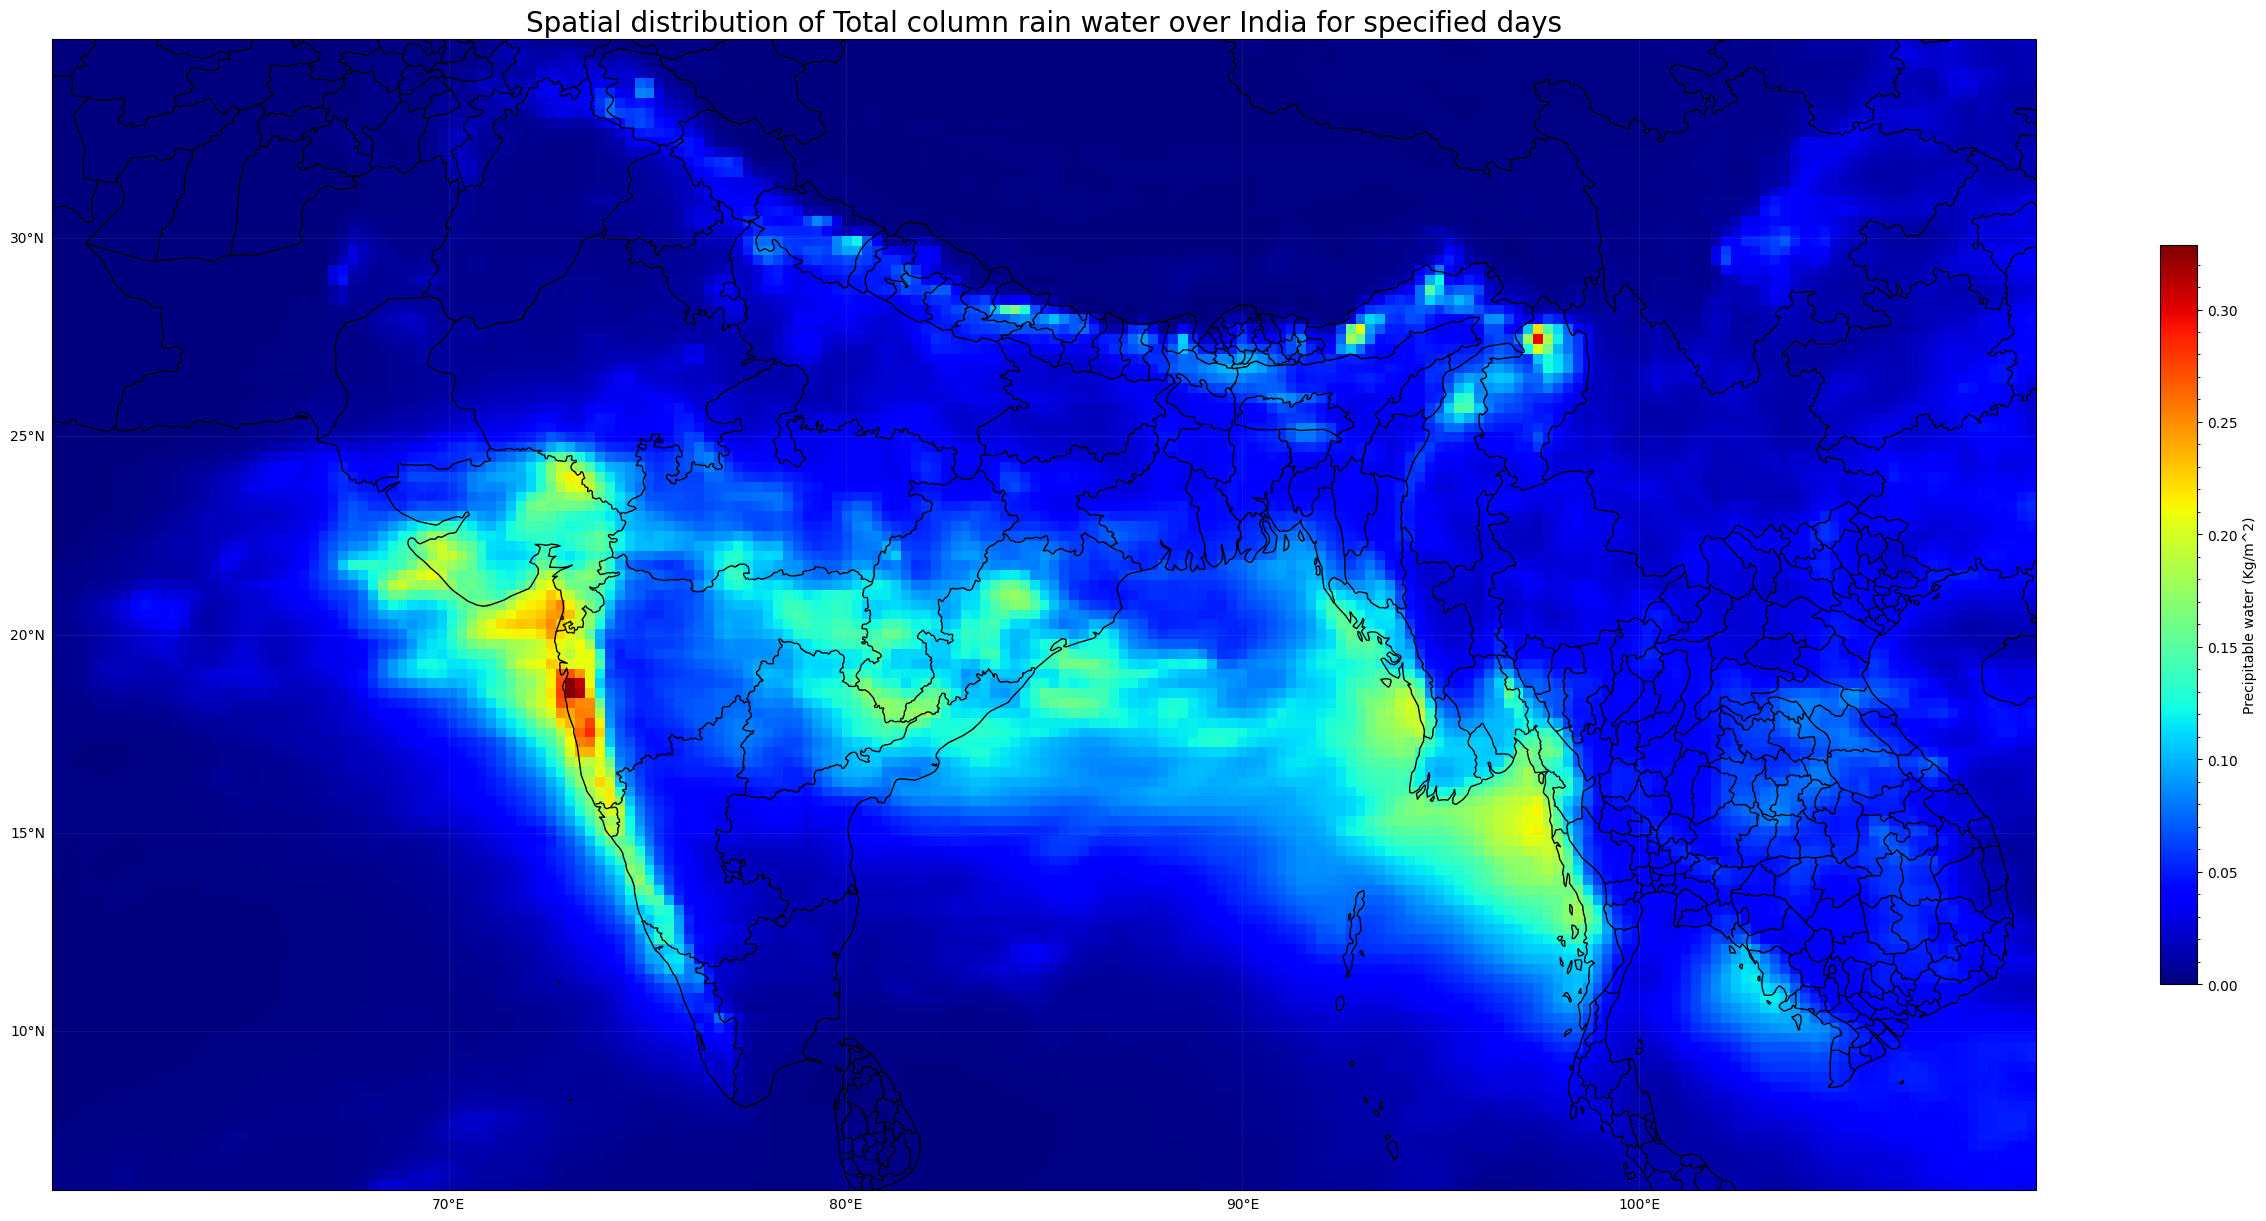

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy as cp
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from pylab import *

# data = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/clim_extreme/eca_r10mm.CIR.spatial.nc')
# data = data.squeeze()

# data_array = np.asarray(data['heavy_precipitation_days_index_per_time_period'])
lon = prec_water_clim.longitude
lat = prec_water_clim.latitude

fig = plt.figure(figsize=(32,32))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

mp = ax.imshow(prec_water_clim,extent=(lon.min(),lon.max(),lat.min(),lat.max()),cmap='jet',origin='upper')
plt.title('Spatial distribution of Total column rain water over India for specified days',fontsize=20)

# rest of the code remains the same


states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='black')
ax.add_feature(states_provinces, edgecolor='black')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp, shrink=0.3,label='Precipitable water (Kg/m^2)')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

plt.savefig('/home/shiv/Documents/GitHub/EES405/assignment_3/plots_assignment-3/precipitable-water.png', dpi=1200, bbox_inches='tight')
plt.show()


Cloud cover over India 

In [31]:
cloud = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/assignment_3/output-cloud-cover-india.nc')

In [32]:
cloud

<xarray.Dataset>
Dimensions:    (time: 90, bnds: 2, longitude: 201, latitude: 117)
Coordinates:
  * time       (time) datetime64[ns] 2008-07-25T11:00:00 ... 2019-08-07T11:00:00
  * longitude  (longitude) float32 60.0 60.25 60.5 60.75 ... 109.5 109.8 110.0
  * latitude   (latitude) float32 35.0 34.75 34.5 34.25 ... 6.75 6.5 6.25 6.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    tcc        (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Tue Apr 11 01:06:47 2023: cdo sellonlatbox,60,110,6,35 outp...
    frequency:    day
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [33]:
cloud = cloud['tcc']

In [34]:
cloud_clim = cloud.mean(dim='time')

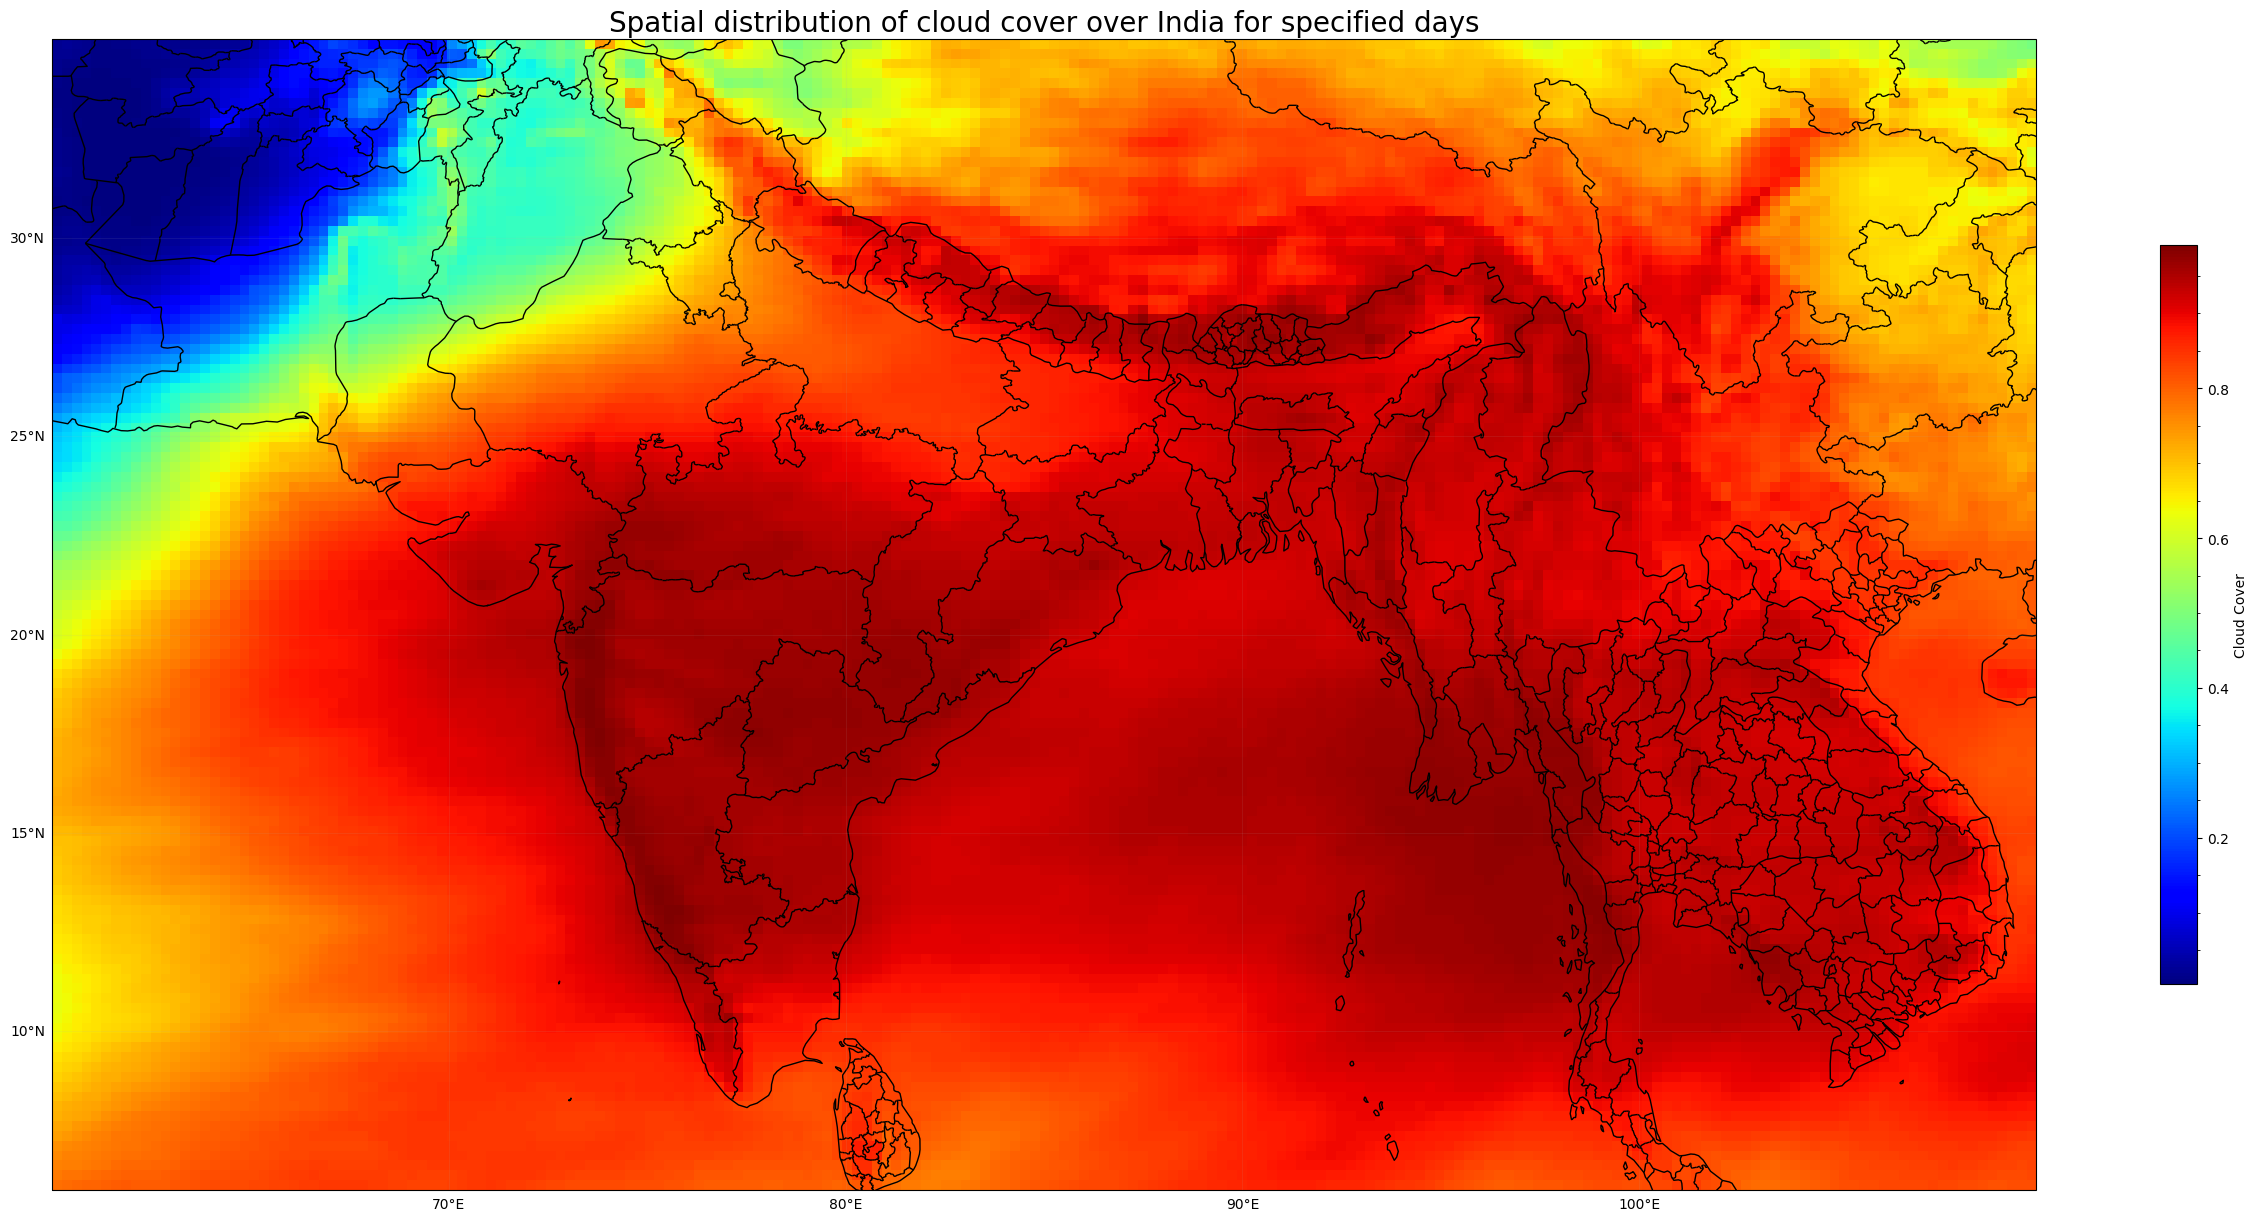

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy as cp
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from pylab import *

# data = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/clim_extreme/eca_r10mm.CIR.spatial.nc')
# data = data.squeeze()

# data_array = np.asarray(data['heavy_precipitation_days_index_per_time_period'])
lon = cloud_clim.longitude
lat = cloud_clim.latitude

fig = plt.figure(figsize=(32,32))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

mp = ax.imshow(cloud_clim,extent=(lon.min(),lon.max(),lat.min(),lat.max()),cmap='jet',origin='upper')
plt.title('Spatial distribution of cloud cover over India for specified days',fontsize=20)

# rest of the code remains the same


states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='black')
ax.add_feature(states_provinces, edgecolor='black')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp, shrink=0.3,label='Cloud Cover')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

plt.savefig('/home/shiv/Documents/GitHub/EES405/assignment_3/plots_assignment-3/cloud-cover.png', dpi=1200, bbox_inches='tight')
plt.show()


cdo -P 12 -v -splityear tpmm.1960.2020.nc tp_

cdo -P 12 -v -sub -eca_r10mm tp_1960.nc tp.ref.nc eca_r10mm-1960.nc
cdo -P 12 -v -sub -eca_r10mm tp_1961.nc tp.ref.nc eca_r10mm-1961.nc
cdo -P 12 -v -sub -eca_r10mm tp_1962.nc tp.ref.nc eca_r10mm-1962.nc
cdo -P 12 -v -sub -eca_r10mm tp_1963.nc tp.ref.nc eca_r10mm-1963.nc
cdo -P 12 -v -sub -eca_r10mm tp_1964.nc tp.ref.nc eca_r10mm-1964.nc
cdo -P 12 -v -sub -eca_r10mm tp_1965.nc tp.ref.nc eca_r10mm-1965.nc
cdo -P 12 -v -sub -eca_r10mm tp_1966.nc tp.ref.nc eca_r10mm-1966.nc
cdo -P 12 -v -sub -eca_r10mm tp_1967.nc tp.ref.nc eca_r10mm-1967.nc
cdo -P 12 -v -sub -eca_r10mm tp_1968.nc tp.ref.nc eca_r10mm-1968.nc
cdo -P 12 -v -sub -eca_r10mm tp_1969.nc tp.ref.nc eca_r10mm-1969.nc
cdo -P 12 -v -sub -eca_r10mm tp_1970.nc tp.ref.nc eca_r10mm-1970.nc
cdo -P 12 -v -sub -eca_r10mm tp_1971.nc tp.ref.nc eca_r10mm-1971.nc
cdo -P 12 -v -sub -eca_r10mm tp_1972.nc tp.ref.nc eca_r10mm-1972.nc
cdo -P 12 -v -sub -eca_r10mm tp_1973.nc tp.ref.nc eca_r10mm-1973.nc
cdo -P 12 -v -sub -eca_r10mm tp_1974.nc tp.ref.nc eca_r10mm-1974.nc
cdo -P 12 -v -sub -eca_r10mm tp_1975.nc tp.ref.nc eca_r10mm-1975.nc
cdo -P 12 -v -sub -eca_r10mm tp_1976.nc tp.ref.nc eca_r10mm-1976.nc
cdo -P 12 -v -sub -eca_r10mm tp_1977.nc tp.ref.nc eca_r10mm-1977.nc
cdo -P 12 -v -sub -eca_r10mm tp_1978.nc tp.ref.nc eca_r10mm-1978.nc
cdo -P 12 -v -sub -eca_r10mm tp_1979.nc tp.ref.nc eca_r10mm-1979.nc
cdo -P 12 -v -sub -eca_r10mm tp_1980.nc tp.ref.nc eca_r10mm-1980.nc
cdo -P 12 -v -sub -eca_r10mm tp_1981.nc tp.ref.nc eca_r10mm-1981.nc
cdo -P 12 -v -sub -eca_r10mm tp_1982.nc tp.ref.nc eca_r10mm-1982.nc
cdo -P 12 -v -sub -eca_r10mm tp_1983.nc tp.ref.nc eca_r10mm-1983.nc
cdo -P 12 -v -sub -eca_r10mm tp_1984.nc tp.ref.nc eca_r10mm-1984.nc
cdo -P 12 -v -sub -eca_r10mm tp_1985.nc tp.ref.nc eca_r10mm-1985.nc
cdo -P 12 -v -sub -eca_r10mm tp_1986.nc tp.ref.nc eca_r10mm-1986.nc
cdo -P 12 -v -sub -eca_r10mm tp_1987.nc tp.ref.nc eca_r10mm-1987.nc
cdo -P 12 -v -sub -eca_r10mm tp_1988.nc tp.ref.nc eca_r10mm-1988.nc
cdo -P 12 -v -sub -eca_r10mm tp_1989.nc tp.ref.nc eca_r10mm-1989.nc
cdo -P 12 -v -sub -eca_r10mm tp_1990.nc tp.ref.nc eca_r10mm-1990.nc
cdo -P 12 -v -sub -eca_r10mm tp_1991.nc tp.ref.nc eca_r10mm-1991.nc
cdo -P 12 -v -sub -eca_r10mm tp_1992.nc tp.ref.nc eca_r10mm-1992.nc
cdo -P 12 -v -sub -eca_r10mm tp_1993.nc tp.ref.nc eca_r10mm-1993.nc
cdo -P 12 -v -sub -eca_r10mm tp_1994.nc tp.ref.nc eca_r10mm-1994.nc
cdo -P 12 -v -sub -eca_r10mm tp_1995.nc tp.ref.nc eca_r10mm-1995.nc
cdo -P 12 -v -sub -eca_r10mm tp_1996.nc tp.ref.nc eca_r10mm-1996.nc
cdo -P 12 -v -sub -eca_r10mm tp_1997.nc tp.ref.nc eca_r10mm-1997.nc
cdo -P 12 -v -sub -eca_r10mm tp_1998.nc tp.ref.nc eca_r10mm-1998.nc
cdo -P 12 -v -sub -eca_r10mm tp_1999.nc tp.ref.nc eca_r10mm-1999.nc
cdo -P 12 -v -sub -eca_r10mm tp_2000.nc tp.ref.nc eca_r10mm-2000.nc
cdo -P 12 -v -sub -eca_r10mm tp_2001.nc tp.ref.nc eca_r10mm-2001.nc
cdo -P 12 -v -sub -eca_r10mm tp_2002.nc tp.ref.nc eca_r10mm-2002.nc
cdo -P 12 -v -sub -eca_r10mm tp_2003.nc tp.ref.nc eca_r10mm-2003.nc
cdo -P 12 -v -sub -eca_r10mm tp_2004.nc tp.ref.nc eca_r10mm-2004.nc
cdo -P 12 -v -sub -eca_r10mm tp_2005.nc tp.ref.nc eca_r10mm-2005.nc
cdo -P 12 -v -sub -eca_r10mm tp_2006.nc tp.ref.nc eca_r10mm-2006.nc
cdo -P 12 -v -sub -eca_r10mm tp_2007.nc tp.ref.nc eca_r10mm-2007.nc
cdo -P 12 -v -sub -eca_r10mm tp_2008.nc tp.ref.nc eca_r10mm-2008.nc
cdo -P 12 -v -sub -eca_r10mm tp_2009.nc tp.ref.nc eca_r10mm-2009.nc
cdo -P 12 -v -sub -eca_r10mm tp_2010.nc tp.ref.nc eca_r10mm-2010.nc
cdo -P 12 -v -sub -eca_r10mm tp_2011.nc tp.ref.nc eca_r10mm-2011.nc
cdo -P 12 -v -sub -eca_r10mm tp_2012.nc tp.ref.nc eca_r10mm-2012.nc
cdo -P 12 -v -sub -eca_r10mm tp_2013.nc tp.ref.nc eca_r10mm-2013.nc
cdo -P 12 -v -sub -eca_r10mm tp_2014.nc tp.ref.nc eca_r10mm-2014.nc
cdo -P 12 -v -sub -eca_r10mm tp_2015.nc tp.ref.nc eca_r10mm-2015.nc
cdo -P 12 -v -sub -eca_r10mm tp_2016.nc tp.ref.nc eca_r10mm-2016.nc
cdo -P 12 -v -sub -eca_r10mm tp_2017.nc tp.ref.nc eca_r10mm-2017.nc
cdo -P 12 -v -sub -eca_r10mm tp_2018.nc tp.ref.nc eca_r10mm-2018.nc
cdo -P 12 -v -sub -eca_r10mm tp_2019.nc tp.ref.nc eca_r10mm-2019.nc
cdo -P 12 -v -sub -eca_r10mm tp_2020.nc tp.ref.nc eca_r10mm-2020.nc


cdo -mergetime eca_r10mm-1960.nc eca_r10mm-1961.nc eca_r10mm-1962.nc eca_r10mm-1963.nc eca_r10mm-1964.nc eca_r10mm-1965.nc eca_r10mm-1966.nc eca_r10mm-1967.nc eca_r10mm-1968.nc eca_r10mm-1969.nc eca_r10mm-1970.nc eca_r10mm-1971.nc eca_r10mm-1972.nc eca_r10mm-1973.nc eca_r10mm-1974.nc eca_r10mm-1975.nc eca_r10mm-1976.nc eca_r10mm-1977.nc eca_r10mm-1978.nc eca_r10mm-1979.nc eca_r10mm-1980.nc eca_r10mm-1981.nc eca_r10mm-1982.nc eca_r10mm-1983.nc eca_r10mm-1984.nc eca_r10mm-1985.nc eca_r10mm-1986.nc eca_r10mm-1987.nc eca_r10mm-1988.nc eca_r10mm-1989.nc eca_r10mm-1990.nc eca_r10mm-1991.nc eca_r10mm-1992.nc eca_r10mm-1993.nc eca_r10mm-1994.nc eca_r10mm-1995.nc eca_r10mm-1996.nc eca_r10mm-1997.nc eca_r10mm-1998.nc eca_r10mm-1999.nc eca_r10mm-2000.nc eca_r10mm-2001.nc eca_r10mm-2002.nc eca_r10mm-2003.nc eca_r10mm-2004.nc eca_r10mm-2005.nc eca_r10mm-2006.nc eca_r10mm-2007.nc eca_r10mm-2008.nc eca_r10mm-2009.nc eca_r10mm-2010.nc eca_r10mm-2011.nc eca_r10mm-2012.nc eca_r10mm-2013.nc eca_r10mm-2014.nc eca_r10mm-2015.nc eca_r10mm-2016.nc eca_r10mm-2017.nc eca_r10mm-2018.nc eca_r10mm-2019.nc eca_r10mm-2020.nc eca_r10mm-year.nc

cdo fldsum eca_r10mm-year.nc eca_r10mm-year.hist.nc

rm -rf eca_* tp_* eca_r10mm-year.nc